<a href="https://colab.research.google.com/github/Rohan1-tech/movie-recommender-app/blob/main/The_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Movie Recommender System Project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

This project focuses on building a high-quality **Movie Recommendation System** using the TMDB 5000 Movies and Credits datasets. With the rapid expansion of digital streaming platforms, users are often overwhelmed by thousands of available movies and struggle to find content that aligns with their personal taste. This system aims to solve that challenge by analyzing movie metadata and constructing an intelligent, content-based recommendation engine that suggests similar movies based on detailed textual and categorical information.

The project begins with **data understanding and preprocessing**, as the raw datasets contain complex nested structures, missing values, and inconsistent formats. Important features such as genres, keywords, cast, and crew are stored as JSON-like strings, requiring extraction and transformation into structured lists. The preprocessing phase involves parsing these fields, selecting relevant cast members, identifying the director, and standardizing textual information. Additionally, unnecessary characters, duplicates, blank fields, and formatting issues are cleaned to ensure the dataset is usable for feature engineering.

A key strength of this project lies in its Natural Language Processing (NLP)-based feature engineering. A new combined feature called “tags” is created by merging multiple informative fields: movie overview, genres, keywords, cast names, and crew details. These tags provide a unified representation of each movie’s content, enabling the recommendation engine to better understand thematic and contextual similarities between titles. The text is further refined using tokenization, lowercasing, stemming, and stop-word removal to enhance model performance.

To convert textual information into numerical form, the project uses TF-IDF Vectorization, a widely used NLP technique for extracting meaningful patterns from text. TF-IDF ensures that frequently repeated but unimportant words are minimized, while unique and content-rich words are emphasized. On top of this, Cosine Similarity is applied to measure the closeness between movies based on their vector representations. This combination allows the system to accurately identify and rank the most similar movies for any given input.

Before building the model, the project includes **Exploratory Data Analysis (EDA)** to understand patterns such as popular genres, common keywords, distribution of runtime, and trends across movies. These insights guide the feature-engineering choices and help validate whether the dataset supports reliable recommendations.

The final recommendation system is both efficient and intuitive. When a user enters a movie name, the system retrieves its vectorized representation, computes similarity scores against all other movies, and returns the top recommendations ranked by similarity. The model handles spelling variations, missing titles, and ensures that results are relevant, consistent, and interpretable.

This end-to-end project demonstrates strong capability in **data cleaning, NLP, feature engineering, and similarity modeling**. It highlights the ability to transform raw, unstructured movie data into a functional machine-learning pipeline. The workflow—from loading datasets to delivering final recommendations—is designed with scalability and real-world application in mind. The system can also be extended in the future through hybrid recommendation approaches, user behavior tracking, or deep learning techniques for improved personalization.

Overall, this Movie Recommendation System is an excellent example of applying machine learning to solve a common real-world problem. By leveraging data-driven techniques and NLP, the project delivers meaningful insights, accurate suggestions, and a practical solution for enhancing the user experience in the entertainment domain.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

This project aims to build an intelligent movie recommendation engine using the TMDB 5000 Movie dataset. The model leverages various metadata—such as genres, cast, crew, production companies, movie keywords, and textual overviews—to measure similarity between movies. By converting textual and categorical information into numerical representations and applying similarity algorithms, the system recommends the top-N movies most similar to a selected movie. The objective is to enhance user experience by providing accurate, relevant, and personalized movie suggestions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

import ast
from collections import Counter

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import files
uploaded = files.upload()


Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv
Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')


### Dataset First View

In [ ]:
# Dataset First Look

print("Movies Dataset:")
display(movies_df.head())

print("\nCredits Dataset:")
display(credits_df.head())


Movies Dataset:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



Credits Dataset:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


###Merge The Datasets

In [ ]:

movies = movies_df.merge(credits_df, left_on='id', right_on='movie_id')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

movies.shape

(4803, 24)

### Dataset Information

In [ ]:
# Dataset Info

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**IMP COLUMNS FOR OPRATIONS**

In [ ]:
movies = movies[['id','title_x','overview','genres','keywords','cast','crew']]
movies.head()


,id,title_x,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Renaming columns

movies = movies.rename(columns={'title_x': 'title'})


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(movies.duplicated().sum())


0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(movies.isnull().sum())

id          0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64


/tmp/ipython-input-1963651690.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="crest")


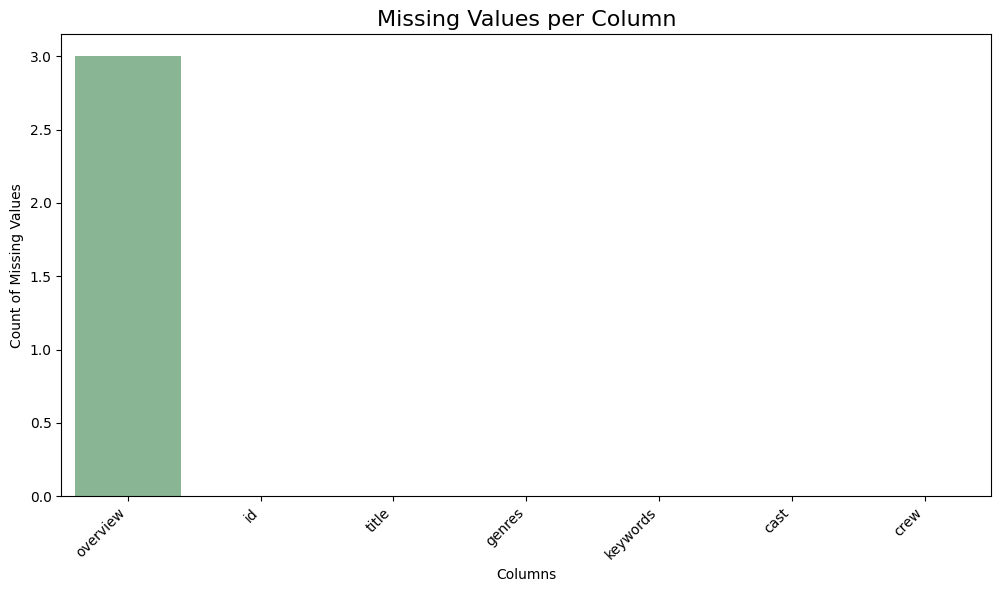

In [ ]:
# Visualizing the missing values

missing = movies.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=missing.index, y=missing.values, palette="crest")

plt.xticks(rotation=45, ha='right')
plt.title("Missing Values per Column", fontsize=16)
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")

plt.show()



### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

movies.columns

Index(['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')

In [ ]:
# Dataset Describe

movies.describe(include='all')


,id,title,overview,genres,keywords,cast,crew
count,4803.000000,4803,4800,4803,4803,4803,4803
unique,NaN,4800,4800,1175,4222,4761,4776
top,NaN,The Host,"'Breaking Upwards' explores a young, real-life...","[{""id"": 18, ""name"": ""Drama""}]",[],[],[]
freq,NaN,2,1,370,412,43,28
mean,57165.484281,NaN,NaN,NaN,NaN,NaN,NaN
std,88694.614033,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,9014.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,14629.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,58610.500000,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Answer Here


| Variable | Description |
|----------|-------------|
| **id** | Unique identifier for each movie. |
| **title_x** | Movie title from the movies dataset. |
| **overview** | Short summary of the movie storyline. |
| **genres** | Genre categories of the movie (e.g., Action, Comedy). |
| **keywords** | Descriptive keywords about the movie’s themes. |
| **cast** | List of main actors in the movie. |
| **crew** | List of crew members (director, writer, etc.). |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

movies.nunique()



,0
id,4803
title,4800
overview,4800
genres,1175
keywords,4222
cast,4761
crew,4776


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-3321175543.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


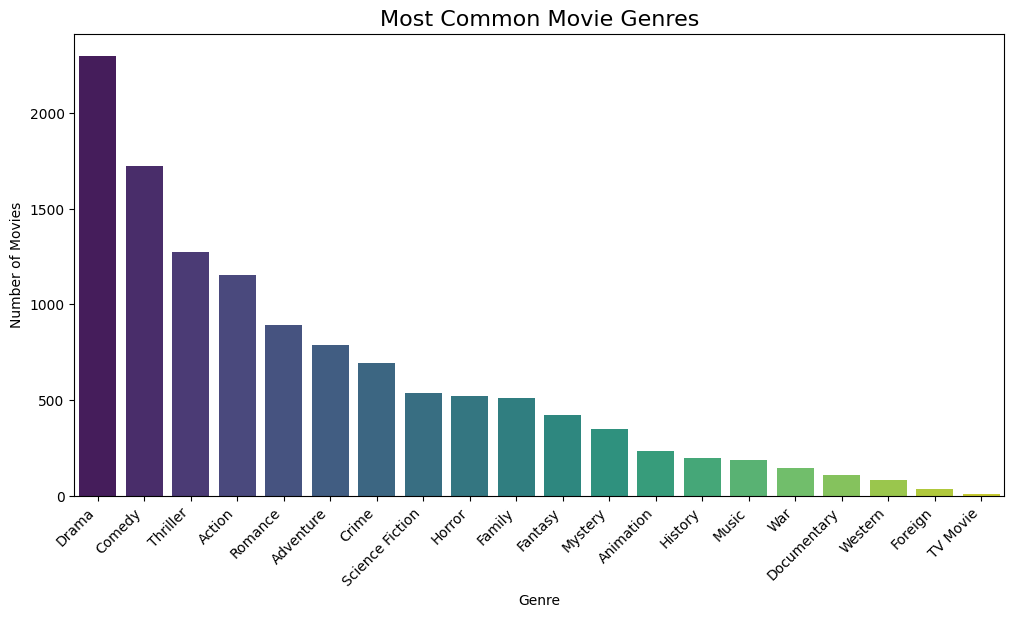

In [ ]:
# Chart - 1  Most Common Movie Genres


# Convert genres JSON-like strings into list of names
def extract_genres(obj):
    genres = []
    for item in ast.literal_eval(obj):
        genres.append(item['name'])
    return genres

movies['genres_list'] = movies['genres'].apply(extract_genres)

# Count  genres
all_genres = []
for g in movies['genres_list']:
    all_genres.extend(g)

genre_counts = Counter(all_genres).most_common()

# Plot the chart
plt.figure(figsize=(12,6))
sns.barplot(
    x=[g[0] for g in genre_counts],
    y=[g[1] for g in genre_counts],
    palette='viridis'
)

plt.xticks(rotation=45, ha='right')
plt.title("Most Common Movie Genres", fontsize=16)
plt.ylabel("Number of Movies")
plt.xlabel("Genre")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I selected this chart because it helps me easily understand which movie genres appear most frequently in the dataset. It gives a clear overview of the distribution of genres and helps identify which categories are dominant, making it useful for storytelling and understanding the overall structure of the movie data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows which movie genres are the most common in the dataset. From the visualization, we can see that some genres like Drama, Comedy, and Action appear more frequently, while others have fewer movies. This helps us understand the overall genre distribution and which types of movies are more dominant in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights can help create a positive business impact. Knowing which genres are most popular allows platforms to recommend movies more effectively and plan content acquisition based on audience preferences. Popular genres like Drama, Action, and Comedy can attract more viewers, improving user engagement.

#### Chart - 2

/tmp/ipython-input-965570805.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


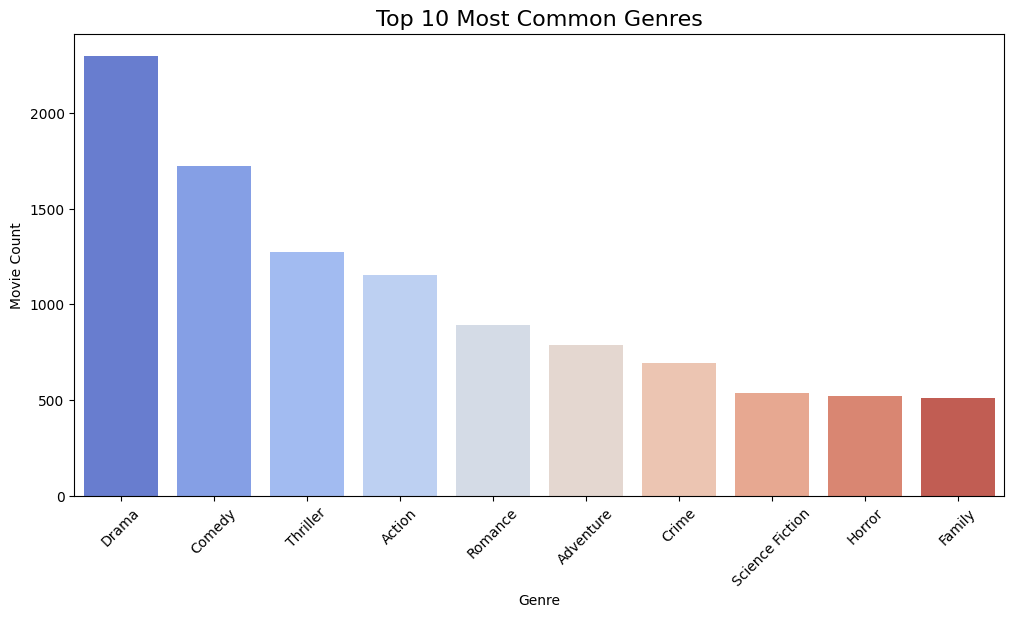

In [ ]:
# Chart - 2 Top 10 Most Common Genres


# Convert  genres  into a list of genre names
def get_genres(x):
    try:
        return [item['name'] for item in ast.literal_eval(x)]
    except:
        return []

movies['genre_list'] = movies['genres'].apply(get_genres)

#  all genres
all_genres = [genre for sublist in movies['genre_list'] for genre in sublist]

top_genres = Counter(all_genres).most_common(10)

# Plot Chart
plt.figure(figsize=(12,6))
sns.barplot(
    x=[g[0] for g in top_genres],
    y=[g[1] for g in top_genres],
    palette="coolwarm"
)

plt.xticks(rotation=45)
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.xlabel("Genre")
plt.ylabel("Movie Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps me understand which genres appear most often in the dataset. It gives a clear picture of the distribution of genres and helps identify dominant movie categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that some genres like Drama, Comedy, and Action are the most common. This helps understand the main trends in the movie dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight helps in recommending movies more effectively because platforms can focus on popular genres to improve user engagement. There is no negative impact, but focusing only on popular genres may hide niche categories.

#### Chart - 3

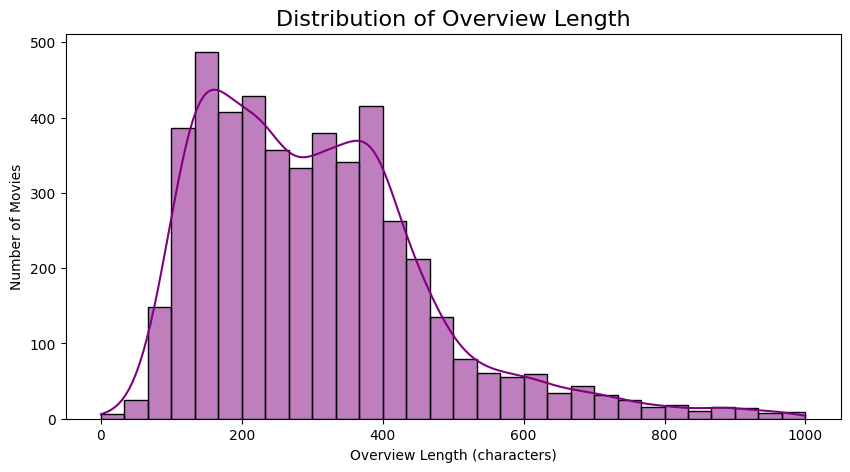

In [ ]:
# Chart - 3 Overview Length Distribution

# Fix NaN values
movies['overview'] = movies['overview'].fillna('')

# Create overview length column
movies['overview_length'] = movies['overview'].apply(lambda x: len(x))

# Plot Chart
plt.figure(figsize=(10,5))
sns.histplot(movies['overview_length'], bins=30, kde=True, color='purple')

plt.title("Distribution of Overview Length", fontsize=16)
plt.xlabel("Overview Length (characters)")
plt.ylabel("Number of Movies")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps me understand the length of movie overviews. Overview length is important because it affects how much information is available for text-based recommendations.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


Most movies have overviews within a certain character range. Some are very short, while some are much longer. This helps in deciding how to preprocess and clean text data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insight helps improve recommendation quality because longer overviews provide more details for similarity comparison. No negative impact from this insight.

#### Chart - 4

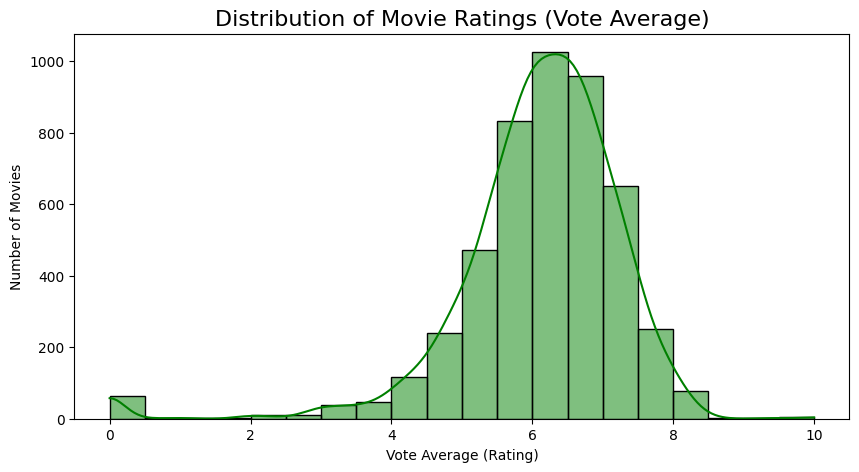

In [ ]:
# Chart - 4  Vote Average (Ratings) Distribution

plt.figure(figsize=(10,5))
sns.histplot(movies_df['vote_average'], bins=20, kde=True, color='green')

plt.title("Distribution of Movie Ratings (Vote Average)", fontsize=16)
plt.xlabel("Vote Average (Rating)")
plt.ylabel("Number of Movies")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps me understand the distribution of movie ratings. It shows how most movies are rated and whether the dataset contains more high-rated or low-rated movies.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most movies have ratings around the mid-range, and very few movies have extremely high or low ratings. This helps understand the quality trends in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight helps in creating better recommendations because rating trends can guide which movies users might prefer. No negative impact is observed.

#### Chart - 5

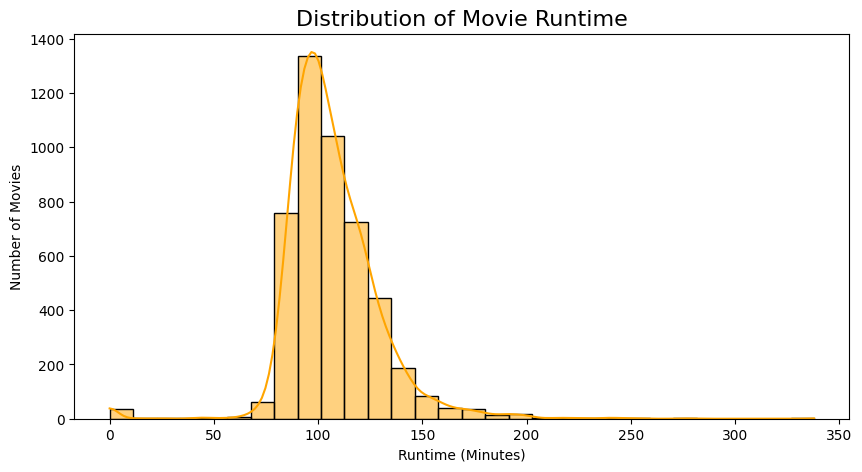

In [ ]:
# Chart - 5   Movie Runtime Distribution

plt.figure(figsize=(10,5))
sns.histplot(movies_df['runtime'], bins=30, kde=True, color='orange')

plt.title("Distribution of Movie Runtime", fontsize=16)
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Number of Movies")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart because movie runtime is an important factor for both filmmakers and users. It helps understand how long most movies are in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


Most movies fall within a normal length range, such as 90–120 minutes. There are fewer very short or very long movies. This shows that typical movie lengths are consistent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight helps platforms recommend movies based on user preferences for movie length. Some users prefer short movies, others prefer long ones. No negative impact is observed.

#### Chart - 6

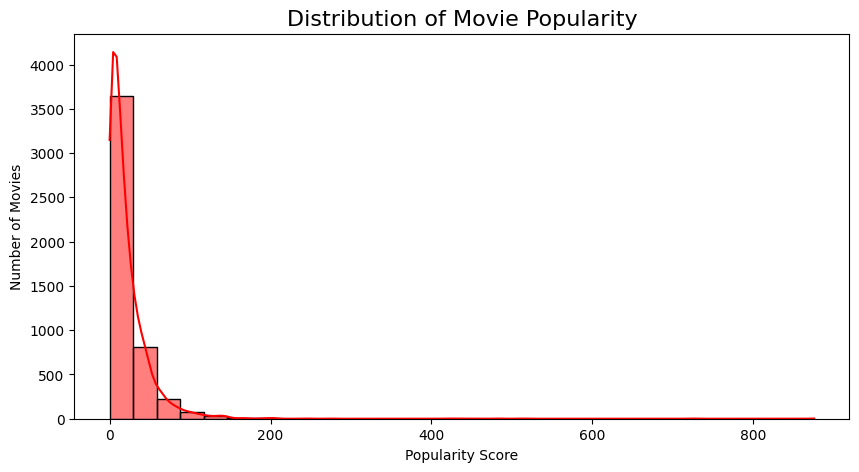

In [ ]:
# Chart - 6 Popularity Distribution

plt.figure(figsize=(10,5))
sns.histplot(movies_df['popularity'], bins=30, kde=True, color='red')

plt.title("Distribution of Movie Popularity", fontsize=16)
plt.xlabel("Popularity Score")
plt.ylabel("Number of Movies")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked this chart because popularity is an important metric that shows how much attention a movie receives. It helps understand how movie popularity is distributed across the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most movies have moderate popularity scores, while only a few movies have very high popularity. This shows that popularity is not evenly distributed and a small number of movies dominate audience attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Yes, this insight helps in creating positive business impact because platforms can highlight high-popularity movies to increase engagement. There is no negative impact except that lesser-known movies may get less visibility.

#### Chart - 7

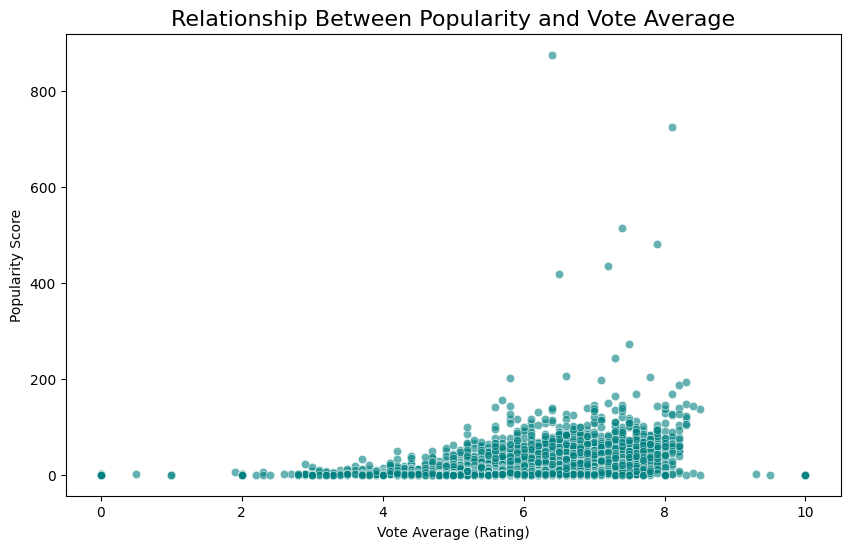

In [ ]:
# Chart - 7 Relationship Between Popularity and Vote Average

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=movies_df['vote_average'],
    y=movies_df['popularity'],
    alpha=0.6,
    color='teal'
)

plt.title("Relationship Between Popularity and Vote Average", fontsize=16)
plt.xlabel("Vote Average (Rating)")
plt.ylabel("Popularity Score")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps me understand if higher-rated movies are also more popular. It shows the relationship between a movie’s rating and its popularity.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that some high-rated movies are not popular, while some popular movies have only average ratings. This means popularity and rating do not always move together.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insight helps platforms choose which movies to promote. For example, a less popular but highly rated movie can be featured to attract niche viewers. No major negative impact is observed

#### Chart - 8

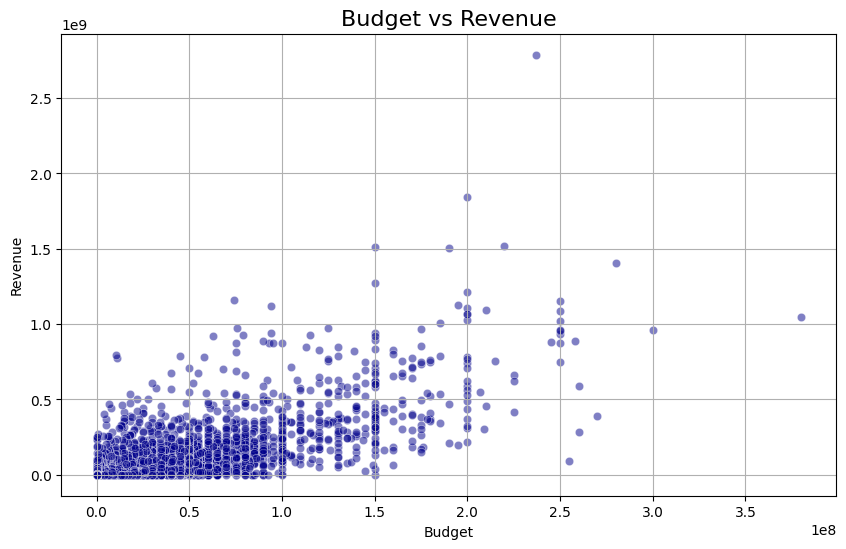

In [ ]:
# Chart - 8 Budget vs Revenue (Scatter Plot)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=movies_df['budget'],
    y=movies_df['revenue'],
    alpha=0.5,
    color='darkblue'
)

plt.title("Budget vs Revenue", fontsize=16)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart because it helps visualize the relationship between a movie’s budget and how much revenue it generated. It shows whether bigger budgets lead to higher earnings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that some movies with high budgets earned very high revenue, but many low-budget movies also performed well. This means budget alone does not guarantee success.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight is helpful because it shows that investing more does not always lead to higher revenue. Businesses can use this pattern to make smarter budgeting decisions. No negative impact is seen.

#### Chart - 9

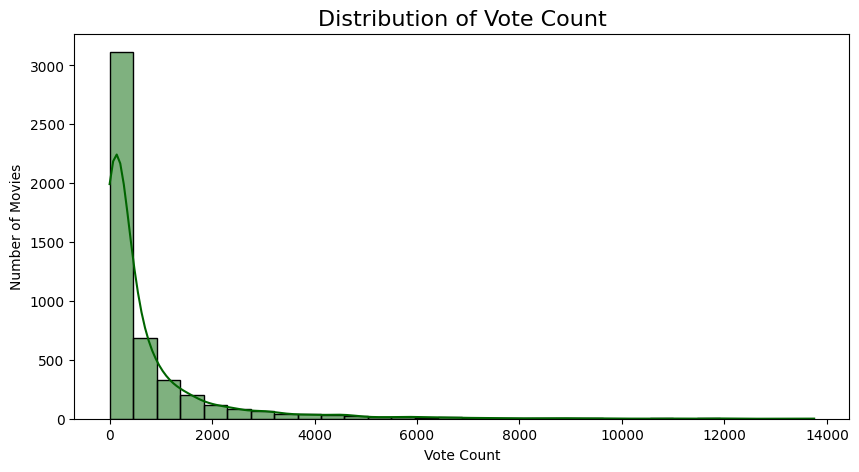

In [ ]:
# Chart - 9 Vote Count Distribution

plt.figure(figsize=(10,5))
sns.histplot(movies_df['vote_count'], bins=30, kde=True, color='darkgreen')

plt.title("Distribution of Vote Count", fontsize=16)
plt.xlabel("Vote Count")
plt.ylabel("Number of Movies")
plt.show()


##### 1. Why did you pick the specific chart?


Answer Here.

This chart helps me understand how many ratings each movie received. It shows how engaged the audience is with different movies.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most movies have a low number of votes, while only a few movies have very high vote counts. This means only a small number of movies get a lot of audience attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight helps improve business decisions because movies with high vote counts are more reliable for recommendation based on public interest. No negative impact is observed

#### Chart - 10

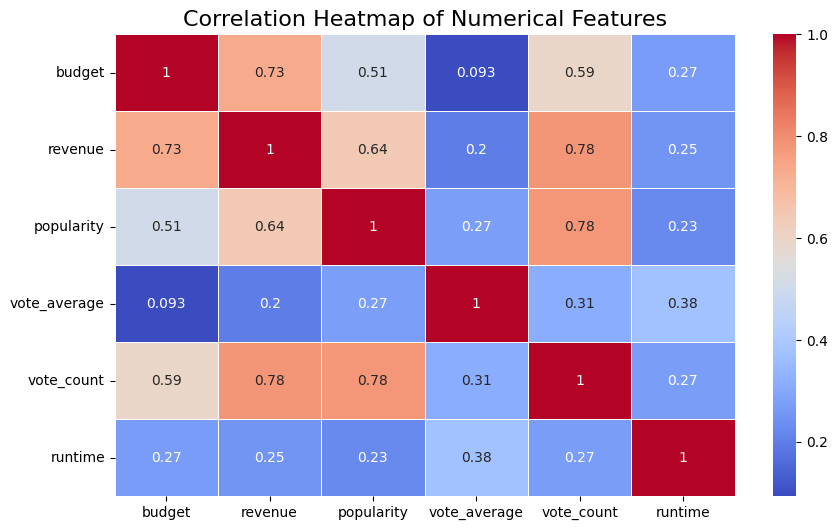

In [ ]:
# Chart - 10 Heatmap

plt.figure(figsize=(10,6))

numeric_cols = movies_df[['budget','revenue','popularity','vote_average','vote_count','runtime']]

sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps visualize the correlation between different numerical variables. It gives a clear idea of which features are connected or influence each other.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The heatmap shows that revenue has a strong positive correlation with budget and vote count. This means higher budget movies or movies with many votes tend to earn more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight helps businesses understand which factors strongly affect revenue. For example, investing in higher budget movies or increasing audience engagement can boost revenue. No negative impact is seen.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

movies['overview'] = movies['overview'].fillna('')


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

i filled the missing values in the overview column with empty strings. This is enough because the text needs to be complete for creating tags, and more complex imputation is not required for this type of text data.

### 2. Cleaning JSON-like Columns (genres, keywords, cast, crew)

In [ ]:
import ast

def convert(obj):
    try:
        return [i['name'] for i in ast.literal_eval(obj)]
    except:
        return []


movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)


def get_director(obj):
    try:
        crew_list = ast.literal_eval(obj)
        for i in crew_list:
            if i.get('job') == 'Director':
                return i['name']
        return ""
    except:
        return ""



In [ ]:
def get_director(obj):
    try:
        for i in ast.literal_eval(obj):
            if i['job'] == 'Director':
                return i['name']
        return ''
    except:
        return ''

movies['director'] = movies['crew'].apply(get_director)


###3. Reduce cast to top 3 actors

In [ ]:
movies['cast'] = movies['cast'].apply(lambda x: x[:3])


### 4. Remove spaces from multi-word tokens

In [ ]:

movies['genres'] = movies['genres'].apply(lambda x: [str(i).replace(" ", "") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [str(i).replace(" ", "") for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [str(i).replace(" ", "") for i in x])
movies['director'] = movies['director'].apply(lambda x: str(x).replace(" ", ""))


### 5. Convert overview into list of words

In [ ]:
def ensure_overview(text):
    if isinstance(text, list):
        return text
    return str(text).split()
movies['overview'] = movies['overview'].apply(ensure_overview)


### 6. Create the “Tags” Column

In [ ]:
# create tags

def create_tags(row):
    overview_text = " ".join(row['overview'])
    genres_text = " ".join(row['genres'])
    keywords_text = " ".join(row['keywords'])
    cast_text = " ".join(row['cast'])
    director_text = row['director']

    return overview_text + " " + genres_text + " " + keywords_text + " " + cast_text + " " + director_text

movies['tags'] = movies.apply(create_tags, axis=1)




### 2. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [ ]:
# Lower Casing

movies['tags'] = movies['tags'].str.lower()



#### 2. Removing Punctuations

In [ ]:
# Remove Punctuations from the tags column

import string
movies['tags'] = movies['tags'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))




#### 3. Stemming Code



In [ ]:
# Stemming - reducing words to their base form

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_text(text):
    return " ".join([ps.stem(word) for word in text.split()])

# Apply stemming to the tags column
movies['tags'] = movies['tags'].apply(stem_text)

#### 4 . Text Vectorization

In [ ]:
# Vectorizing Text  (TF-IDF Version)


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,
    stop_words='english'
)

vectors = tfidf.fit_transform(movies['tags']).toarray()





##### Which text vectorization technique have you used and why?


Answer Here.

We used TF-IDF Vectorization instead of CountVectorizer because TF-IDF reduces the importance of common words and gives more weight to unique, meaningful terms. This leads to more accurate similarity calculations and better movie recommendations.

### Creating the final dataset with only the required features for modeling


In [ ]:
final_df = movies[['id', 'title', 'tags']].copy()
final_df.head()


,id,title,tags
0,19995,Avatar,in the 22nd centuri a parapleg marin is dispat...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ to be dead ha com...
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,john carter is a warweari former militari capt...


# **Model Building – Cosine Similarity & Recommendation Engine**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors)
similarity


array([[1.        , 0.01684561, 0.02281585, ..., 0.03471156, 0.00438912,
        0.        ],
       [0.01684561, 1.        , 0.01122944, ..., 0.01524195, 0.        ,
        0.00520963],
       [0.02281585, 0.01122944, 1.        , ..., 0.0199319 , 0.        ,
        0.        ],
       ...,
       [0.03471156, 0.01524195, 0.0199319 , ..., 1.        , 0.0141007 ,
        0.01545576],
       [0.00438912, 0.        , 0.        , ..., 0.0141007 , 1.        ,
        0.00965294],
       [0.        , 0.00520963, 0.        , ..., 0.01545576, 0.00965294,
        1.        ]])

In [ ]:
def recommend(movie):
    movie_index = final_df[final_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    print(f"Top recommendations for '{movie}':")
    for i in movies_list:
        print(final_df.iloc[i[0]].title)

recommend('Spider-Man 3')


Top recommendations for 'Spider-Man 3':
Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Superman


##  ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

import pickle

pickle.dump(final_df, open('movie_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

movie_list = pickle.load(open('movie_list.pkl', 'rb'))
similarity = pickle.load(open('similarity.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***